# Práctica inicial 
## TP integrador - Primera parte
### EDA inicial - Obras Públicas (Dataset Provincia Bs. As)
#### Grupo_08 - Septiembre 2020

##### Dataset de Obras Públicas de la Ciudad de Bs. As: https://data.buenosaires.gob.ar/dataset/ba-obras/archivo/juqdkmgo-181-resource

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Kotz\\Documents\\Ciencia de datos\\TP anual'

In [3]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_csv('observatorio-de-obras-urbanas.csv')
print(f'Shape:{np.shape(obras)}')

Shape:(1117, 36)


In [4]:
# Imprimimos las primeras líneas
obras.head()

,id,entorno,nombre,etapa,tipo,area_responsable,descripcion,monto_contrato,comuna,barrio,...,beneficiarios,mano_obra,compromiso,destacada,ba_elige,link_interno,pliego_descarga,expediente-numero,estudio_ambiental_descarga,financiamiento
0,1,Plan 54 escuelas,Escuela de Educación Primaria N.° 24 D.E. 15 «...,Finalizada,Escuelas,Ministerio de Educación,Primaria,67065700.0,12.0,Villa Urquiza,...,NaN,NaN,NaN,SI,NaN,https://www.buenosaires.gob.ar/baobras/54-escu...,https://buenosaires.gob.ar/areas/planeamiento_...,914412-MDUGC-2013,NaN,NaN
1,2,Donado Holmberg,Calle Holmberg: Nivelación en cruce,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,En el marco del proyecto urbano del Barrio Par...,9950017.0,12.0,Villa Urquiza,...,NaN,16.0,NaN,NaN,NaN,https://www.buenosaires.gob.ar/baobras/Donado-...,https://www.buenosaires.gov.ar/areas/planeamie...,5515928/2014,NaN,NaN
2,3,Área Ambiental Central,Área Ambiental Central: Calles Alsina Y Moreno,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,Se intervinieron los tramos comprendidos entre...,36942632.0,1.0,Montserrat,...,NaN,55.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
3,4,Área Ambiental Central,Área Ambiental Central: Calle Esmeralda I,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,La obra incluyó el tramo ubicado entre la Av. ...,26938294.0,1.0,San Nicolás,...,NaN,59.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
4,5,Villa Olímpica,Villa Olímpica: Demoliciones en el Parque de l...,Finalizada,Vivienda,Secretaría de Transporte y Obras Públicas,Se realizó las demoliciones de las construccio...,6990315.0,8.0,Villa Soldati,...,NaN,NaN,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/villa-o...,https://www.buenosaires.gov.ar/areas/planeamie...,13793268/DGPUYA/2014,NaN,NaN


## Objetivo del Proyecto:
### Alt. 1: Predicción en función del barrio y el tipo de obra a realizar, el monto del contrato
### Alt. 2: Predicción en función del tipo de obra y monto de contrato, el tiempo de realización

#### Primera parte, EDA y pre-procesamiento de datos

In [5]:
# Procedemos a visualizar correctamente todas las columnas del dataset y guardamos en una variable llamada columnas
columnas = obras.columns
columnas

Index(['id', 'entorno', 'nombre', 'etapa', 'tipo', 'area_responsable',
       'descripcion', 'monto_contrato', 'comuna', 'barrio', 'direccion', 'lat',
       'lng', 'fecha_inicio', 'fecha_fin_inicial', 'plazo_meses',
       'porcentaje_avance', 'imagen_1', 'imagen_2', 'imagen_3', 'imagen_4',
       'licitacion_oferta_empresa', 'licitacion_anio', 'contratacion_tipo',
       'nro_contratacion', 'cuit_contratista', 'beneficiarios', 'mano_obra',
       'compromiso', 'destacada', 'ba_elige', 'link_interno',
       'pliego_descarga', 'expediente-numero', 'estudio_ambiental_descarga',
       'financiamiento'],
      dtype='object')

In [6]:
# Vemos cantidad y % de NaN por columna.
# El dato de % nos va a servir a la hora de tomar la decisión de borrar o no filas con NaNs.
total = obras.isnull().sum().sort_values(ascending=False)
percent = (obras.isnull().sum()/obras.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(36)

,Total,Percent
financiamiento,1111,0.994628
ba_elige,1111,0.994628
destacada,1084,0.970457
estudio_ambiental_descarga,1069,0.957028
beneficiarios,922,0.825425
nro_contratacion,874,0.782453
expediente-numero,872,0.780662
mano_obra,864,0.773500
imagen_4,825,0.738585
compromiso,800,0.716204


## Variables de interés a analizar:
- Etapa
- Tipo
- Monto del contrato
- Comuna
- Barrio
- Latitud
- Longitud
- Plazo en meses

### Etapa

In [7]:
# En primer lugar, analizaremos la feature "etapa".
# Comenzaremos analizando cómo vienen dados los valores, para ver si es necesario procesarlos.
etapas= len(obras['etapa'].unique()) 
print(f'En total hay {etapas} etapas de obras."\r\n')
print("\n", obras['etapa'].unique())

En total hay 5 etapas de obras."


 ['Finalizada' 'En ejecución' 'En proyecto' 'En licitación' 'En Ejecución']


In [8]:
# Agruparemos "En ejecución" y "En proyecto", ya que para el caso, pueden ser consideradas similares.
# Acá no inclui "En licitación" porque son obras que aún no arrancaron.

def clean_row(row):
    a= ['En ejecución','En proyecto','En Ejecución']
    
    if row.etapa in a:
        return 'En ejecución'
    return row.etapa

def clean_df(obras):
    obras_cleaned=obras.copy()
    obras_cleaned['etapa']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras)
print(obras_cleaned.etapa.unique())

# Con esto ya queda ok, porque como vimos antes, no hay ninguna sample sin estapa.

['Finalizada' 'En ejecución' 'En licitación']


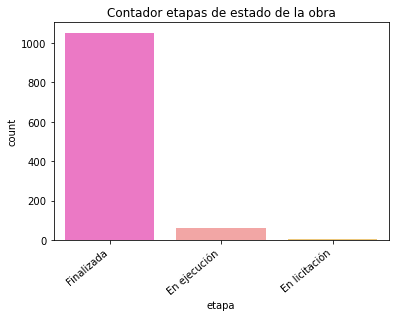

In [9]:
# Visualizamos rápidamente con un countplot

ax = sns.countplot(x='etapa', 
                   data=obras_cleaned, 
                   palette='spring',
                   alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Contador etapas de estado de la obra')
plt.show()

# Vemos que el grueso de los samples ya están finalizados.

### Tipo

In [10]:
# Analizamos la cantidad de valores únicos en el feature de tipo de obra
tipos_obras = len(obras['tipo'].unique()) 
print(f'En total hay {tipos_obras} tipos de obras."\r\n')
print("\n", obras['tipo'].unique())

En total hay 7 tipos de obras."


 ['Escuelas' 'Espacio Público' 'Vivienda' 'Hidráulica e Infraestructura'
 'Arquitectura' 'Transporte' 'Salud']


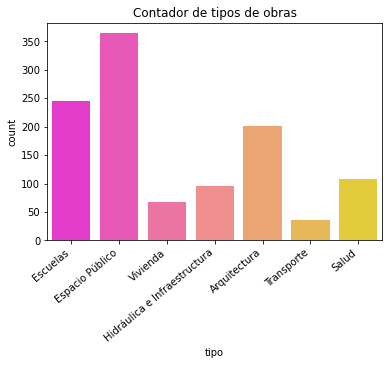

In [11]:
# En este caso no es necesario re agrupar los valores únicos
# Y tampoco se requiere de análisis de NaNs, pero vamos a graficar para comenzar a visualizar:
ax = sns.countplot(x='tipo', 
                   data=obras,
                   palette='spring')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de tipos de obras")
plt.show()

### Monto del contrato 

In [12]:
# Para esta feature, nos interesan más los datos descriptivos de los valores registrados

obras_cleaned['monto_contrato'].describe().astype('int')

# Nuestro valor máximo es negativo?? Está chequeado?

count          1047
mean       54435039
std       233990588
min           47514
25%         1760971
50%         6495745
75%        24848133
max     -2147483648
Name: monto_contrato, dtype: int32

In [13]:
# Dont worry, era una cuestión del int

obras_cleaned.groupby('tipo')['monto_contrato'].aggregate('max').astype('int64')


tipo
Arquitectura                    1389607260
Escuelas                         697650207
Espacio Público                  903283412
Hidráulica e Infraestructura    2893118429
Salud                            296735562
Transporte                      3183200000
Vivienda                        1624752066
Name: monto_contrato, dtype: int64

In [14]:
# Va de nuevo:

obras_cleaned['monto_contrato'].describe().astype('int64')

# Ahora seee

count          1047
mean       54435039
std       233990588
min           47514
25%         1760971
50%         6495745
75%        24848133
max      3183200000
Name: monto_contrato, dtype: int64

Filas: 1047


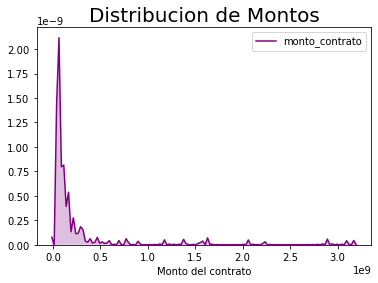

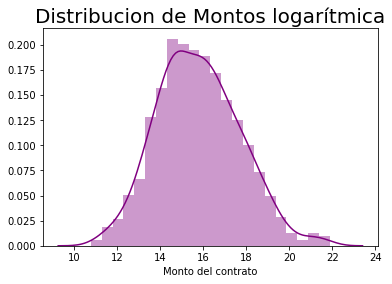

In [15]:
# Vamos a graficar esto, ya sabemos que varios samples no tienen el valor del contrato
# Una de las cosas que buscamos es estimar el monto, si no lo tienen no me sirve
# Borramos los que no tengan monto :o (ahora debrería haber 70 filas menos que antes)

obras_cleaned.dropna(subset=['monto_contrato'], how='any', inplace=True, axis='index')
filas = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas}')

#Plot Monto
sns.kdeplot(obras_cleaned.monto_contrato, color="purple", shade = True)
plt.xlabel("Monto del contrato")
plt.title('Distribucion de Montos',size = 20)
plt.show()

#Pasamos el gráfico a escala log para visualizar mejor la info
# Plot Log-Monto
sns.distplot(np.log(1+obras_cleaned['monto_contrato']),color='purple')
plt.xlabel("Monto del contrato")
plt.title('Distribucion de Montos logarítmica',size = 20)
plt.show()

# Facherito el segundo

### Barrio

Le mandé # a todo para avanzar con el análisis por comuna

In [ ]:
# Analizamos la cantidad de valores únicos en el feature de barrio

#barrio = len(obras_cleaned['barrio'].unique()) 
#print(f'En total hay {barrio} barrios en el análisis.\r\n')
#print("\n", obras_cleaned['barrio'].unique())

In [ ]:
# Algún mono escribió mal (montserrat)
# Villa del Parque está repetido por una mayúscula
# A alguien le salió el turro y puso LA BOCA y otro solo Boca


#def clean_row(row):
   # a= ['La Boca','Boca']
   # b= ['Montserrat','Monserrat']
   # c= ['Villa Del Parque','Villa del Parque']
    
   # if row.barrio in a:
   #     return 'La Boca'
   # if row.barrio in b:
   #     return 'Monserrat'
   # if row.barrio in c:
   #     return 'Villa del Parque'
   # return row.barrio

#def clean_df(obras_cleaned):
  #  obras_cleaned=obras_cleaned.copy()
  #  obras_cleaned['barrio']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
  #  return obras_cleaned

#obras_cleaned=clean_df(obras_cleaned)
#barrio = len(obras_cleaned['barrio'].unique()) 
#print(f'En total hay {barrio} barrios en el análisis.\r\n')
#print(obras_cleaned.barrio.unique())


In [ ]:
# Hay algunos NaNs también, se van.

#obras_cleaned.dropna(subset=['barrio'], how='any', inplace=True, axis='index')
#filas2 = np.shape(obras_cleaned)[0] 
#print(f'Filas: {filas2}')

# Teníamos 1047, así que se fueron solo 5, está bien, no fue tan grave.

In [ ]:
# Probamos visualizar
#plt.figure(figsize=(12,6))
#ax = sns.countplot(x='barrio', data=obras_cleaned)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.title("Contador de obras por barrio")
#plt.show()

In [ ]:
# Fuck, son muchas
# Guardamos los índices de los top barrios (10)

#top = obras_cleaned['barrio'].value_counts(ascending=False).index[0:10]


#plt.figure(figsize=(15,3))
#g = sns.countplot(x='barrio',
                  data=obras_cleaned, 
                  palette = 'spring',
                  order=top)
#g.set_xticklabels(g.get_xticklabels(), 
                  rotation=90, 
                  ha="right")
#plt.title('Barrios con mayor cantidad de obras',size = 20)
#plt.xlabel('Barrio')
#plt.ylabel('Count')
#plt.show()

# A ver qué onda con los más bajos

#bottom = obras_cleaned['barrio'].value_counts().index[39:49]
#plt.figure(figsize=(15,3))
#h = sns.countplot(x='barrio',
                  data=obras_cleaned, 
                  palette = 'viridis',
                  order=bottom)
#h.set_xticklabels(h.get_xticklabels(), 
                  rotation=90, 
                  ha="right")
#plt.title('Barrios con menor cantidad de obras',size = 20)
#plt.xlabel('Barrio')
#plt.ylabel('Count')
#plt.show()

# MMMMM 2 barrios con sólo una obra, creo que nos va a arruinar el accuracy, pruebo con comuna

### Comunas

In [16]:
# Analizamos la cantidad de valores únicos en la feature de comuna.

comuna = len(obras_cleaned['comuna'].unique()) 
print(f'En total hay {comuna} comunas en el análisis.\r\n')
print("\n", obras_cleaned['comuna'].unique())

En total hay 16 comunas en el análisis.


 [12.  1.  8.  2.  9.  4. 13. 14. 11.  5. 15.  3.  7. 10.  6. nan]


In [17]:
#Vamos a borrar las filas con NaNs
#Por las dudas revisamos la cant de NaNs que quedaron en las diferentes columnas.
total = obras_cleaned.isnull().sum().sort_values(ascending=False)
percent = (obras_cleaned.isnull().sum()/obras_cleaned.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
ba_elige,1042,0.995224
financiamiento,1041,0.994269
destacada,1014,0.968481
estudio_ambiental_descarga,1001,0.956065
beneficiarios,858,0.819484
nro_contratacion,807,0.770774
expediente-numero,805,0.768863
mano_obra,802,0.765998
imagen_4,762,0.727794
compromiso,742,0.708691


In [18]:
# Ahora si volamos las 6 filas con NaNs

obras_cleaned.dropna(subset=['comuna'], how='any', inplace=True, axis='index')
filas3 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas3}')

# Está ok porque pasamos de 1047 filas a 1041.

Filas: 1041


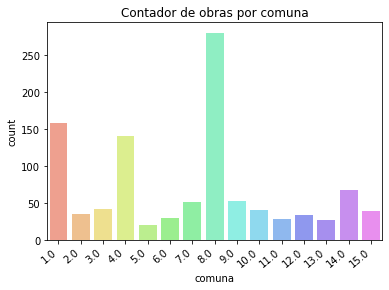

In [19]:
#Visualizamos con un countplot
ax = sns.countplot(x='comuna', 
                   data=obras_cleaned,
                   palette='gist_rainbow',
                   alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de obras por comuna")
plt.show()

### Latitud y longitud 

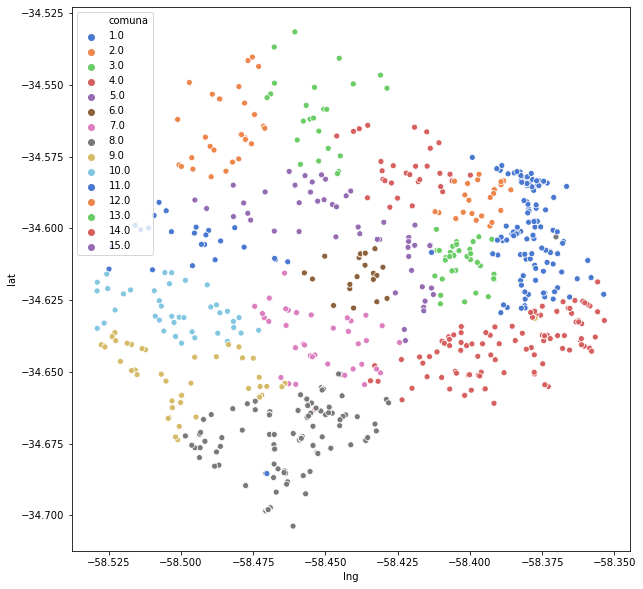

In [20]:
# Primero nos ubicamos en el mapa, identificamos que zona pertenece a cada comuna y vemos la densidad de obras de cada una.

plt.figure(figsize=(10,10))
sns.scatterplot(x=obras_cleaned.lng,
                y=obras_cleaned.lat,
                hue=obras_cleaned.comuna,
                palette='muted')
plt.show()

# Podríamos buscar alguna etiqueta mejor para la comuna
# https://www.buenosaires.gob.ar/comunas

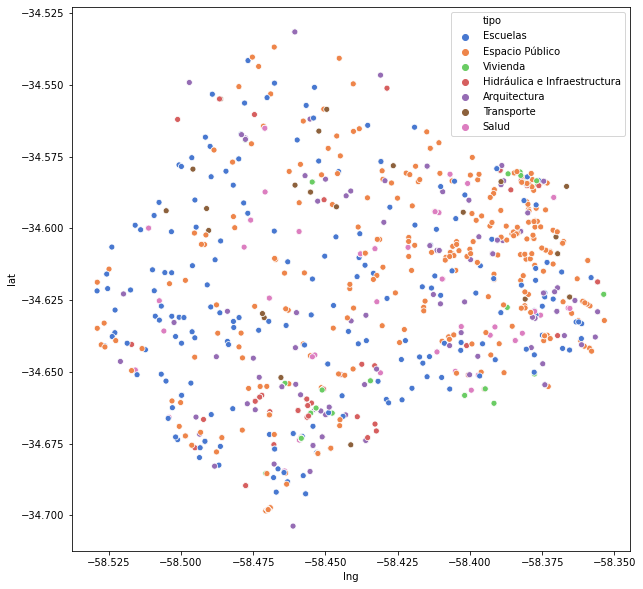

Resumimos la info en una Tabla Pivote:


comuna,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
tipo,,,,,,,,,,,,,,,
Arquitectura,22,4,7,24,2,0,8,66,10,3,1,4,4,29,6
Escuelas,19,3,8,30,5,8,12,32,19,26,12,12,8,5,8
Espacio Público,83,13,21,36,12,11,14,83,14,8,9,7,10,27,7
Hidráulica e Infraestructura,4,1,0,11,0,0,2,57,3,0,0,3,2,0,3
Salud,3,12,6,29,1,10,12,4,4,3,4,4,1,5,7
Transporte,14,2,0,0,0,0,3,2,0,0,2,2,2,1,4
Vivienda,13,0,0,10,0,0,0,36,2,0,0,1,0,0,4


In [21]:
#Ahora que ya sabemos dónde se ubica cada comuna, podemos ver qué tipo de obras predominan en ellas.

plt.figure(figsize=(10,10))
sns.scatterplot(x=obras_cleaned.lng,
                y=obras_cleaned.lat,
                hue=obras_cleaned.tipo,
                palette='muted')
plt.show()

#Tabla pivote
table1 = pd.pivot_table(obras_cleaned,index='tipo',columns = 'comuna', values='monto_contrato' ,fill_value=0, aggfunc = 'count')
print(f'Resumimos la info en una Tabla Pivote:')
table1


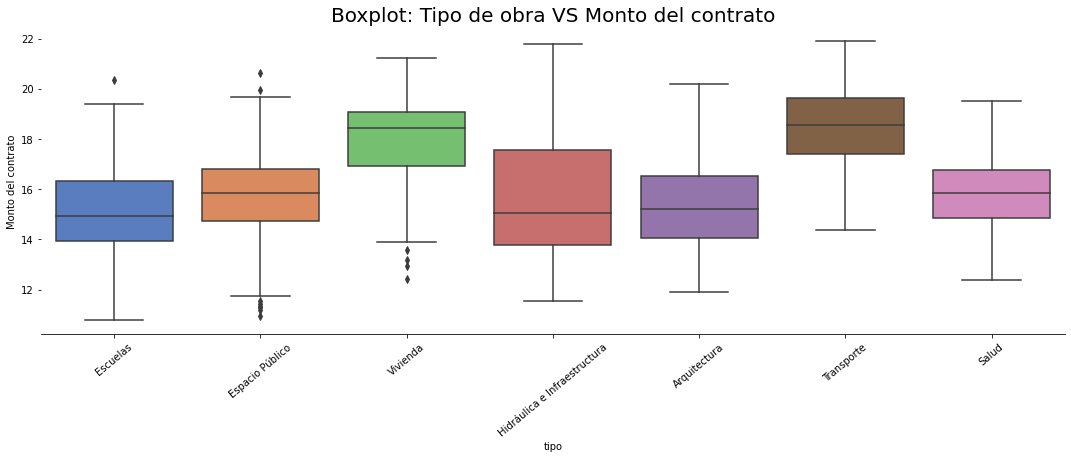

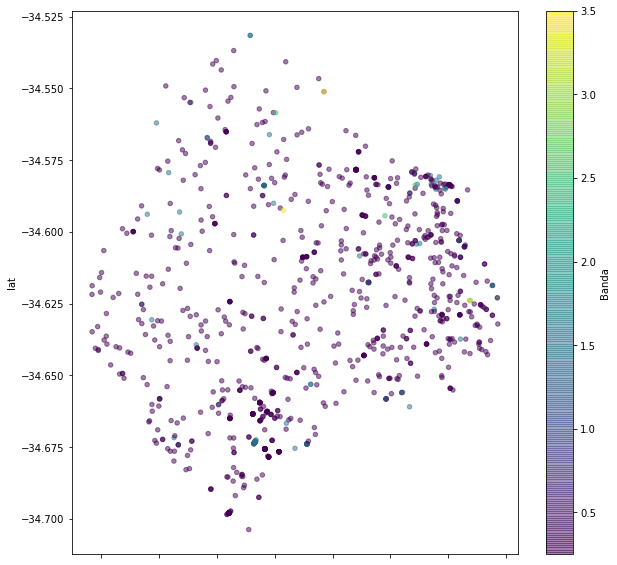

In [22]:
#Estaría bueno ver a qué comunas y a qué tipo de obra se destina un mayor presupuesto.
#Boxplot de Tipo de obra vs log(Monto)

obras_cleaned['log_monto'] = np.log(1+obras_cleaned['monto_contrato'])

g = sns.catplot(x="tipo",y='log_monto',data=obras_cleaned, kind="box", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=40)
g = g.set_ylabels("Monto del contrato")
plt.title('Boxplot: Tipo de obra VS Monto del contrato',size = 20)
plt.show()


#Para verlo por comuna, necesitamos crear bandas de precio.
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 0) & (obras_cleaned['monto_contrato'] <= 2500000000), 'Banda'] = 0.25
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 250000000) & (obras_cleaned['monto_contrato'] <= 500000000), 'Banda']   = 0.5
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 500000000) & (obras_cleaned['monto_contrato'] <= 750000000), 'Banda']   = 7.5
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 750000000) & (obras_cleaned['monto_contrato'] <= 1000000000), 'Banda']   = 1
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 100000000) & (obras_cleaned['monto_contrato'] <= 1500000000), 'Banda']   = 1.5
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 1500000000) & (obras_cleaned['monto_contrato'] <= 2500000000), 'Banda']   = 2.5
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 2500000000), 'Banda']  = 3.5

#Ahora ya podemos plasmarlo en el "mapa", viendo qué comunas tienen los mayores montos.
obras_cleaned.plot(kind='scatter', x='lng', y='lat', c='Banda',
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(10,10))
plt.show()

### Plazo en meses

In [23]:
# Analizamos la cantidad de valores únicos en la feature de plazos de realización

meses = len(obras_cleaned['plazo_meses'].unique()) 
print("\n", obras_cleaned['plazo_meses'].unique())


 [29. 16. 22. 28. 12. 18. 20. 23. 21. 30.  3. 15. 10. 11. 14. 17. 31. 27.
 26. 32. 57.  5. 52.  7. 33.  4. 46. 42. 34. 13.  9.  6.  2. nan 24. 25.
  1.  8.  0. 19. 37. 40. 38. 35. 45. 55. 36. 86.]


In [24]:
# Primero vamos a sacar los NaNs
# Otra opcion podría ser aplicar la media según el tipo de obra y la Banda del monto... O mucho quilombo? Después vemos si pinta

obras_cleaned.dropna(subset=['plazo_meses'], how='any', inplace=True, axis='index')
filas4 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas4}')

Filas: 978


In [25]:
# Vamos a agrupar en períodos
# Para no reemplazar los datos exactos de los plazos, vamos a crear una nueva columna "Plazo en años".

obras_cleaned['plazo_años'] = obras_cleaned['plazo_meses']

# En esta nueva columna, reemplazamos los valores agrupando por períodos.

def clean_row(row):
    a= [0,1,2,3,4,5,6,7,8,9,10,11,12]
    b= [13,14,15,16,17,18,19,20,21,22,23,24]
    c= [25,26,27,28,29,30,31,32,33,34,35,36]
    d= [37,38,39,40,41,42,43,44,45,46,47,48,57,52,55,86]
    #e= [57,52,55,86]
    
    if row.plazo_años in a:
        return 'Menos de 1 año'
    if row.plazo_años in b:
        return 'De 1 a 2 años'
    if row.plazo_años in c:
        return 'De 2 a 3 años'
    if row.plazo_años in d:
        return 'Más de 3 años'
    #if row.plazo_meses in e:
        #return 'Más de 4 años'
    
    
    return row.plazo_años

def clean_df(obras_cleaned):
    obras_cleaned=obras_cleaned.copy()
    obras_cleaned['plazo_años']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras_cleaned)

print(f'Los plazos de las obras ahora quedarán agrupados como:"\r\n')
print(obras_cleaned.plazo_años.unique())

Los plazos de las obras ahora quedarán agrupados como:"

['De 2 a 3 años' 'De 1 a 2 años' 'Menos de 1 año' 'Más de 3 años']


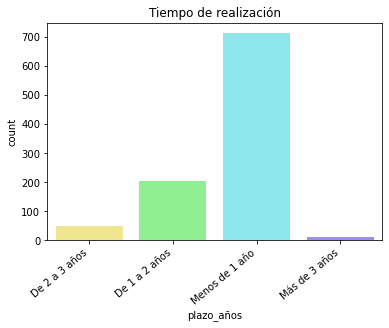

In [26]:
#Visualizamos con un countplot
ax = sns.countplot(x='plazo_años', 
                   data=obras_cleaned,
                   palette='gist_rainbow',
                   alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Tiempo de realización")
plt.show()

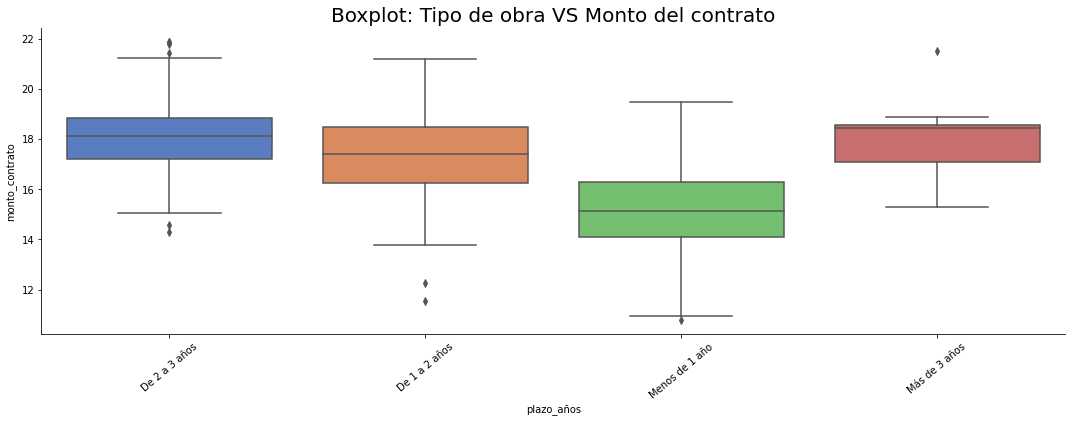

In [27]:
g = sns.catplot(x='plazo_años', y='log_monto',
                data=obras_cleaned, 
                kind="box", # boxen , violin
                height = 5,aspect=3 ,palette = "muted")
g.set_xticklabels(rotation=40)
g = g.set_ylabels("monto_contrato")
plt.title('Boxplot: Tipo de obra VS Monto del contrato',size = 20)
plt.show()

In [28]:
#Primero defininmos los limites de cada categoria y creemos la columna 'Monto'
#acá con loc le indicamos que queremos sólo esos registros


obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 0) & (obras_cleaned['monto_contrato'] <= 4760), 'monto'] = 'Mínimo'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 4760) & (obras_cleaned['monto_contrato'] <= 1760971), 'monto'] = 'Primer Q'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 1760971) & (obras_cleaned['monto_contrato'] <= 6495745), 'monto'] = 'Segundo Q'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 6495745) & (obras_cleaned['monto_contrato'] <= 24848133), 'monto'] = 'Tercer Q'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 24848133), 'monto'] = 'Máximo'

In [29]:
obras_cleaned.head()

,id,entorno,nombre,etapa,tipo,area_responsable,descripcion,monto_contrato,comuna,barrio,...,ba_elige,link_interno,pliego_descarga,expediente-numero,estudio_ambiental_descarga,financiamiento,log_monto,Banda,plazo_años,monto
0,1,Plan 54 escuelas,Escuela de Educación Primaria N.° 24 D.E. 15 «...,Finalizada,Escuelas,Ministerio de Educación,Primaria,67065700.0,12.0,Villa Urquiza,...,NaN,https://www.buenosaires.gob.ar/baobras/54-escu...,https://buenosaires.gob.ar/areas/planeamiento_...,914412-MDUGC-2013,NaN,NaN,18.021183,0.25,De 2 a 3 años,Máximo
1,2,Donado Holmberg,Calle Holmberg: Nivelación en cruce,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,En el marco del proyecto urbano del Barrio Par...,9950017.0,12.0,Villa Urquiza,...,NaN,https://www.buenosaires.gob.ar/baobras/Donado-...,https://www.buenosaires.gov.ar/areas/planeamie...,5515928/2014,NaN,NaN,16.113085,0.25,De 1 a 2 años,Tercer Q
2,3,Área Ambiental Central,Área Ambiental Central: Calles Alsina Y Moreno,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,Se intervinieron los tramos comprendidos entre...,36942632.0,1.0,Montserrat,...,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN,17.424877,0.25,De 1 a 2 años,Máximo
3,4,Área Ambiental Central,Área Ambiental Central: Calle Esmeralda I,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,La obra incluyó el tramo ubicado entre la Av. ...,26938294.0,1.0,San Nicolás,...,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN,17.109059,0.25,De 2 a 3 años,Máximo
4,5,Villa Olímpica,Villa Olímpica: Demoliciones en el Parque de l...,Finalizada,Vivienda,Secretaría de Transporte y Obras Públicas,Se realizó las demoliciones de las construccio...,6990315.0,8.0,Villa Soldati,...,NaN,https://www.buenosaires.gob.ar/baobras/villa-o...,https://www.buenosaires.gov.ar/areas/planeamie...,13793268/DGPUYA/2014,NaN,NaN,15.760036,0.25,Menos de 1 año,Tercer Q


In [30]:
np.shape(obras_cleaned)

(978, 40)

## Ahora a buscar si están relacionados los features

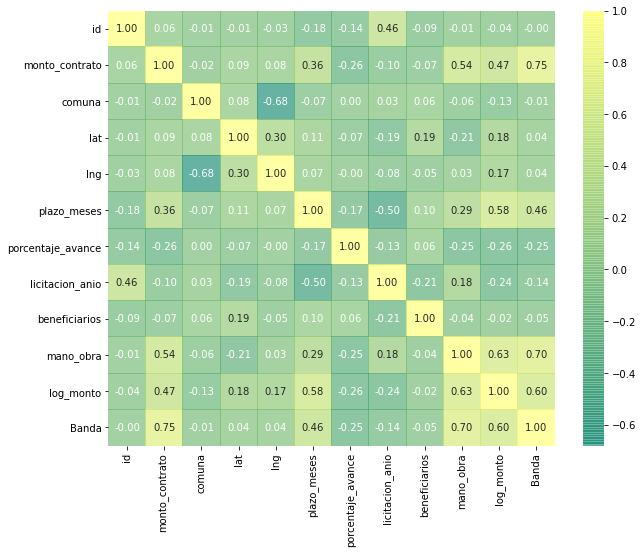

In [31]:
# Matriz de correlación para evaluar si existe alguna relacion lineal entre las variables
corr = obras_cleaned.corr()
#Plot
fig, ax = plt.subplots(figsize=(10, 8))
#Permitimos anotaciones y numeros (float) sobre el mapa
sns.heatmap(corr, cmap='summer', annot=True, fmt=".2f", alpha=0.6)
plt.show()

#Detectamos mayor relacion en las siguientes:
# Monto contrato - plazo en meses
# Monto contrato - mano de obra

#Por algun motivo no están apareciendo todas las columnas en el heatmap.. es porque son valores string?

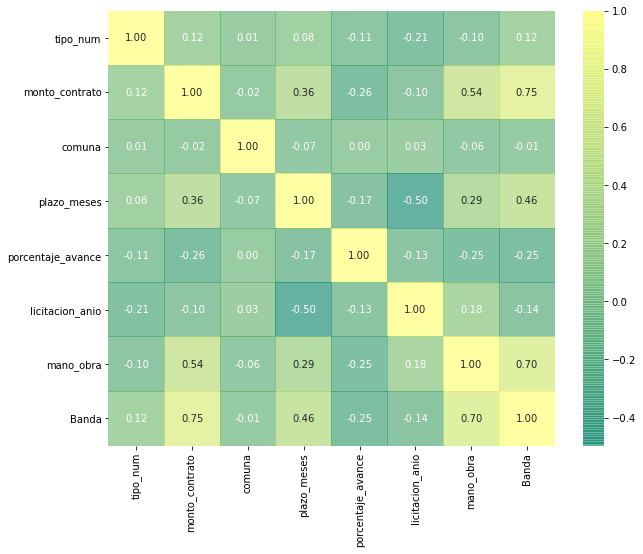

In [33]:
#Por algun motivo no están apareciendo todas las columnas en el heatmap

#Podríamos crear la columna "tipo" expresada numericamente, para ver si con eso hacemos algo..
obras_cleaned.loc[(obras_cleaned['tipo'] == 'Escuelas'), 'tipo_num'] = 1
obras_cleaned.loc[(obras_cleaned['tipo'] == 'Espacio Público') , 'tipo_num']   = 2
obras_cleaned.loc[(obras_cleaned['tipo'] == 'Vivienda') , 'tipo_num']   = 3
obras_cleaned.loc[(obras_cleaned['tipo'] == 'Hidráulica e Infraestructura'), 'tipo_num'] = 4
obras_cleaned.loc[(obras_cleaned['tipo'] == 'Arquitectura') , 'tipo_num']   = 5
obras_cleaned.loc[(obras_cleaned['tipo'] == 'Transporte') , 'tipo_num']   = 6
obras_cleaned.loc[(obras_cleaned['tipo'] == 'Salud'), 'tipo_num']  = 7

#Armamos un nuevo df con las columnas que nos gustaria analizar

obras_cut = obras_cleaned.loc[:, ['entorno', 'nombre', 'etapa', 'tipo_num', 'area_responsable',
       'descripcion', 'monto_contrato', 'comuna', 'barrio', 'fecha_inicio', 'plazo_meses',
       'porcentaje_avance', 'licitacion_anio', 'contratacion_tipo', 'mano_obra','Banda']]

# Again: Matriz de correlación para evaluar si existe alguna relacion lineal entre las variables
corr2 = obras_cut.corr()
#Plot
fig, ax = plt.subplots(figsize=(10, 8))
#Permitimos anotaciones y numeros (float) sobre el mapa
sns.heatmap(corr2, cmap='summer', annot=True, fmt=".2f", alpha=0.6)
plt.show()

#Bueno, esto no tiene ningun sentido, porque aunque se trate de nros, no por eso la matriz va a mostrarnos linealidad, nais :)))

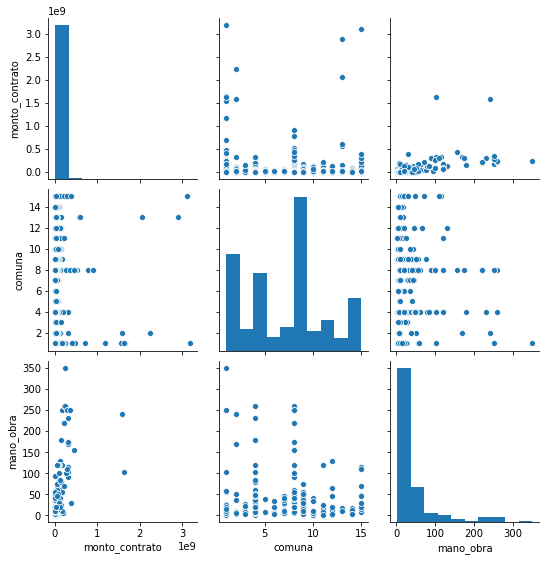

In [34]:
#Gráfico PairPlot de seaborn

graf=obras_cleaned.loc[:,['etapa','tipo', 'monto_contrato','comuna', 'barrio','mano_obra']]

sns.pairplot(data=graf)
plt.show()

# los valores string no me van a traer nada.. tendría que convertirlos en dummies

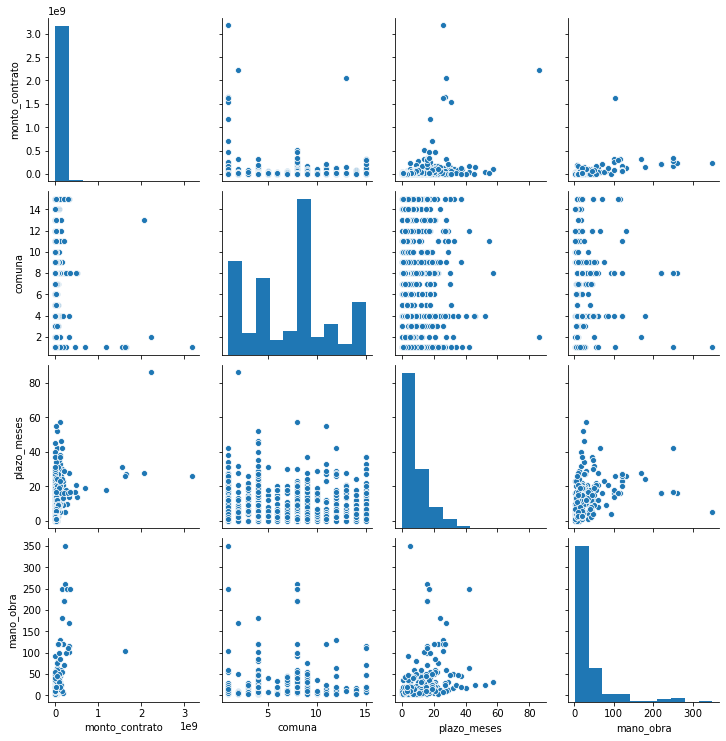

In [35]:
# Gráfico PairPlot de seaborn, considerando sólo las obras finalizadas.

obras_finalizadas = obras_cleaned.loc[obras_cleaned['etapa']== 'Finalizada']

graf2=obras_finalizadas.loc[:,['etapa','tipo', 'monto_contrato','comuna', 'barrio', 'plazo_meses', 'mano_obra']]

sns.pairplot(data=graf2)
plt.show()

### Pre processing y aplicación de modelos de clasificación (Alt.2)

In [36]:
# Volvemos a chequear que columnas tenemos en el dataset para conocer el nro. de col
# Debe existir una forma más sencilla de conocer el nro que se corresponde con cada columna, pero bue
print(f'Shape: {np.shape(obras_cleaned)}')
columnas = obras_cleaned.columns
columnas

Shape: (978, 41)


Index(['id', 'entorno', 'nombre', 'etapa', 'tipo', 'area_responsable',
       'descripcion', 'monto_contrato', 'comuna', 'barrio', 'direccion', 'lat',
       'lng', 'fecha_inicio', 'fecha_fin_inicial', 'plazo_meses',
       'porcentaje_avance', 'imagen_1', 'imagen_2', 'imagen_3', 'imagen_4',
       'licitacion_oferta_empresa', 'licitacion_anio', 'contratacion_tipo',
       'nro_contratacion', 'cuit_contratista', 'beneficiarios', 'mano_obra',
       'compromiso', 'destacada', 'ba_elige', 'link_interno',
       'pliego_descarga', 'expediente-numero', 'estudio_ambiental_descarga',
       'financiamiento', 'log_monto', 'Banda', 'plazo_años', 'monto',
       'tipo_num'],
      dtype='object')

In [37]:
# Nuestro target:  Tiempo de realización en años
y=obras_cleaned.iloc[:,38]                                   # slicing: todas las filas y columna 38
print(y)

0        De 2 a 3 años
1        De 1 a 2 años
2        De 1 a 2 años
3        De 2 a 3 años
4       Menos de 1 año
             ...      
1111    Menos de 1 año
1112    Menos de 1 año
1114    Menos de 1 año
1115    Menos de 1 año
1116    Menos de 1 año
Name: plazo_años, Length: 978, dtype: object


In [38]:
# Nuestras features: Monto de contrato y Comuna
x=obras_cleaned.iloc[:,7:9:1]                                # slicing: todas las filas y columnas 7 a 8
print(x)
type(x)

      monto_contrato  comuna
0         67065700.0    12.0
1          9950017.0    12.0
2         36942632.0     1.0
3         26938294.0     1.0
4          6990315.0     8.0
...              ...     ...
1111       2325368.0     8.0
1112       1984627.0     8.0
1114       6557067.0     9.0
1115      22279428.0    15.0
1116      14024377.0    11.0

[978 rows x 2 columns]


pandas.core.frame.DataFrame

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# No sé que modelo va a servir, así que por las dudas importo todos:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#Transformamos el label del target en formato numerico para poder procesarlo
# LabelEncoder sirve para normalizar las labels entre 0 y n-clases y ademas transforma a numerico.

# Vamos a agregar un encoder al target o variable objetivo
le= preprocessing.LabelEncoder()
y= le.fit_transform(y)
obras_cleaned['Plazo Encoded']=y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
obras_cleaned.tail(10)

Classes: ['De 1 a 2 años' 'De 2 a 3 años' 'Menos de 1 año' 'Más de 3 años']
Response variable after encoding: [1 0 0 1 2 0 0 0 0 0 0 0 0 0 1 2 0 2 2 0 0 0 2 0 2 0 2 0 1 1 1 1 0 0 1 1 0
 0 1 3 2 3 0 2 1 2 0 0 2 2 1 1 1 2 2 2 3 2 2 2 3 1 2 3 0 2 0 2 2 2 2 0 0 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 1 0 1 0 1 0 0 0 0 1 0 2 1 1 2 2 2 2 0 2
 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2 2
 3 2 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 3 0 1 0 2 1 0 2 0 2 0 0 0 2 2 2 0 2
 2 2 2 0 2 2 0 2 2 2 2 0 0 0 2 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 0 1 0
 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 3 2 2 0 0 1 0 1 0 0 2 2 0 0 0 0 0 1 0
 2 0 1 0 1 0 2 0 0 2 3 2 2 0 2 2 0 1 2 2 2 2 2 0 2 2 2 2 0 0 2 2 

,id,entorno,nombre,etapa,tipo,area_responsable,descripcion,monto_contrato,comuna,barrio,...,pliego_descarga,expediente-numero,estudio_ambiental_descarga,financiamiento,log_monto,Banda,plazo_años,monto,tipo_num,Plazo Encoded
1106,25920,Plazas y Parques de Comuna 4,Parque España Incorporación de Riego,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,6678193.0,4.0,Barracas,...,NaN,NaN,NaN,NaN,15.714358,0.25,Menos de 1 año,Tercer Q,2.0,2
1107,25921,Plazas y Parques de Comuna 4,Ameghino Incorporación de Riego,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,4552167.0,4.0,Parque Patricios,...,NaN,NaN,NaN,NaN,15.331114,0.25,Menos de 1 año,Segundo Q,2.0,2
1108,25922,Plazas y Parques de Comuna 4,Plaza Colombia Incorporación de Riego,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,1339138.0,4.0,Barracas,...,NaN,NaN,NaN,NaN,14.107537,0.25,Menos de 1 año,Primer Q,2.0,2
1109,25923,Plazas y Parques de Comuna 8,Prefectura Naval Argentina Incorporación de Riego,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,1805036.0,1.0,Puerto Madero,...,NaN,NaN,NaN,NaN,14.406092,0.25,Menos de 1 año,Segundo Q,2.0,2
1110,25924,Plazas y Parques de Comuna 8,Delom Incorporación de Riego,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,1858684.0,8.0,Villa Lugano,...,NaN,NaN,NaN,NaN,14.435380,0.25,Menos de 1 año,Segundo Q,2.0,2
1111,25925,Plazas y Parques de Comuna 8,De los Vecinos Incorporación de Riego,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,2325368.0,8.0,Villa Lugano,...,NaN,NaN,NaN,NaN,14.659389,0.25,Menos de 1 año,Segundo Q,2.0,2
1112,25926,Plazas y Parques de Comuna 8,Mariano Saavedra Incorporación de Riego,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,1984627.0,8.0,Villa Lugano,...,NaN,NaN,NaN,NaN,14.500942,0.25,Menos de 1 año,Segundo Q,2.0,2
1114,25928,Plazas y Parques de Comuna 9,Plaza Dr Carlos S Lamas Remodelación Patio de ...,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,6557067.0,9.0,Mataderos,...,NaN,NaN,NaN,NaN,15.696054,0.25,Menos de 1 año,Tercer Q,2.0,2
1115,25929,Plazas y Parques de Comuna 15,Plaza 25 de agosto Remodelación Patio de Juegos,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,22279428.0,15.0,Villa Ortúzar,...,NaN,NaN,NaN,NaN,16.919174,0.25,Menos de 1 año,Tercer Q,2.0,2
1116,25930,Plazas y Parques de Comuna 11,Plaza Aristóbulo del Valle Remodelación Patio ...,Finalizada,Espacio Público,Subsecretaría de Gestión Comunal,NaN,14024377.0,11.0,Villa Del Parque,...,NaN,NaN,NaN,NaN,16.456308,0.25,Menos de 1 año,Tercer Q,2.0,2


In [41]:
#Separamos train y test stes
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.5, random_state=4)

In [42]:
# Auto scaling. Creamos el scaler y lo fiteamos con el train-set
scaler=preprocessing.StandardScaler().fit(x_train)

In [43]:
# Estandarizamos el set de entrenamiento 
x_train_scaled=scaler.transform(x_train)
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[0.0000000e+00 5.0856842e-17]
[1. 1.]


In [44]:
# Estandarizamos el test set. No lo usamos hasta la validación!
x_test_scaled=scaler.transform(x_test)
print(x_test_scaled.mean(axis=0))
print(x_test_scaled.std(axis=0))

[-0.06099494 -0.14970477]
[0.66892017 0.91519336]


In [45]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador. Así podremos hacer comparaciones
# "Model": el utilizado; Features": lineales o polinomicas.

results_clasif = pd.DataFrame(columns=['Model','Best HyperParam','Accuracy'])

#### Entrenamos con KNN

In [46]:
parameters={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23]}
knn=KNeighborsClassifier()
clasif1=GridSearchCV(knn, param_grid=parameters, refit=True, cv=5)
clasif1.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23]})

In [47]:
#Muestro los mejores parámetros
clasif1.best_params_

{'n_neighbors': 16}

In [48]:
y_pred1=clasif1.predict(x_test_scaled)

In [49]:
# Computo el accuracy (comparo ytest vs ypred)
test_acc1 = accuracy_score(y_test, y_pred1)
print("El accuracy es " + str(test_acc1))

El accuracy es 0.7505112474437627


In [50]:
# Guardamos los resultados
results_clasif = results_clasif.append({'Model':'KNN',
                                'Best HyperParam':clasif1.best_params_,
                                'Accuracy':test_acc1},ignore_index=True)
results_clasif

,Model,Best HyperParam,Accuracy
0,KNN,{'n_neighbors': 16},0.750511


#### Entrenamos con LR

In [51]:
parameters={'C': [ 2, 3, 4, 4.1, 4.2, 4.3,4.4, 4.5, 4.8, 5, 5.2, 5.5, 5.9,  6, 7, 8, 9, 10, 100]}
lr_model=LogisticRegression (random_state=8, solver='lbfgs')
clasif2=GridSearchCV(lr_model, param_grid=parameters, refit=True, cv=5)
clasif2.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=8),
             param_grid={'C': [2, 3, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.8, 5, 5.2,
                               5.5, 5.9, 6, 7, 8, 9, 10, 100]})

In [52]:
clasif2.best_params_

{'C': 2}

In [53]:
y_pred2=clasif2.predict(x_test_scaled)
test_acc2 = accuracy_score(y_test, y_pred2)
print("El accuracy es " + str(test_acc2))

El accuracy es 0.7770961145194274


In [54]:
# Guardamos los resultados
results_clasif = results_clasif.append({'Model':'LR',
                                'Best HyperParam':clasif2.best_params_,
                                'Accuracy':test_acc2},ignore_index=True)
results_clasif

,Model,Best HyperParam,Accuracy
0,KNN,{'n_neighbors': 16},0.750511
1,LR,{'C': 2},0.777096


#### Entrenamos con SVM

In [55]:
parameters={'kernel':('linear','rbf'),
            'C':[0.3, 0.4, 0.5, 0.6, 0.62, 0.65, 0.68, 0.7, 0.8, 0.9],
            'gamma':[  5.5, 5.8, 6,6.1, 6.2, 6.3,6.4,6.5, 6.8]}
svc=svm.SVC(probability=True)
clasif3=GridSearchCV(svc, param_grid=parameters, refit=True, cv=5)
clasif3.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.3, 0.4, 0.5, 0.6, 0.62, 0.65, 0.68, 0.7, 0.8,
                               0.9],
                         'gamma': [5.5, 5.8, 6, 6.1, 6.2, 6.3, 6.4, 6.5, 6.8],
                         'kernel': ('linear', 'rbf')})

In [56]:
clasif3.best_params_

{'C': 0.9, 'gamma': 5.5, 'kernel': 'rbf'}

In [57]:
y_pred3=clasif3.predict(x_test_scaled)
test_acc3 = accuracy_score(y_test, y_pred3)
print("El accuracy es " + str(test_acc3))

El accuracy es 0.7791411042944786


In [58]:
# Guardamos los resultados
results_clasif = results_clasif.append({'Model':'SVM',
                                'Best HyperParam':clasif3.best_params_,
                                'Accuracy':test_acc3},ignore_index=True)
results_clasif

,Model,Best HyperParam,Accuracy
0,KNN,{'n_neighbors': 16},0.750511
1,LR,{'C': 2},0.777096
2,SVM,"{'C': 0.9, 'gamma': 5.5, 'kernel': 'rbf'}",0.779141
